In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#readind data
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:
#checking for null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.info

<bound method DataFrame.info of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code R

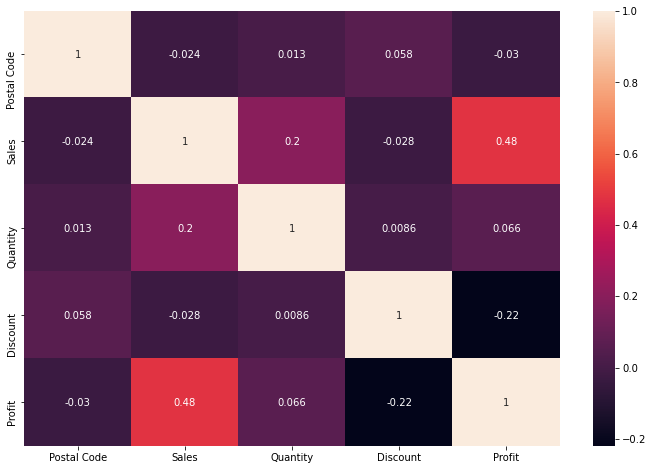

In [7]:
#checking for correlation
plt.figure(1, figsize = (12, 8))
cor = sns.heatmap(df.corr(), annot = True)

In [8]:
df['Country'].unique()

array(['United States'], dtype=object)

There is only one country - United States

### Top cities in sales

In [9]:
tc = df['City'].value_counts().nlargest(10)
tc

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64

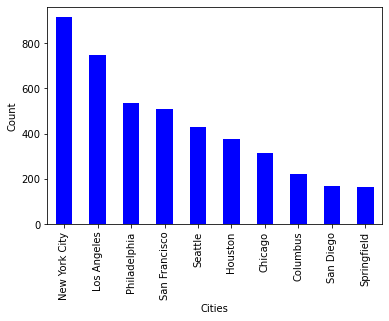

In [10]:
tc.plot(kind = 'bar', color = 'blue')
plt.ylabel('Count')
plt.xlabel('Cities')
plt.show()

## Analyzing different catagories

In [11]:
category = df['Category'].unique()
print(category)

['Furniture' 'Office Supplies' 'Technology']


In [12]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

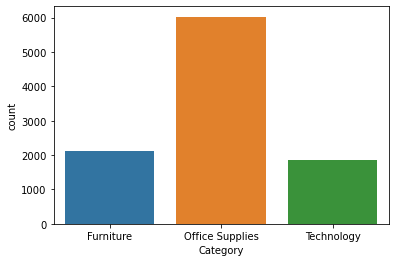

In [13]:
sns.countplot(x = 'Category', data = df)

### Top States

In [14]:
ts = df['State'].value_counts().nlargest(10)
ts

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

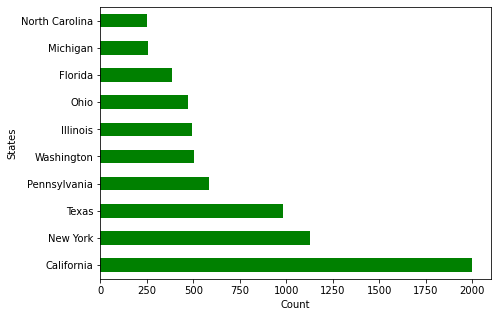

In [15]:
plt.figure(figsize = (7,5))
ts.plot(kind = 'barh', color = 'green')
plt.ylabel('States')
plt.xlabel('Count')
plt.show()

### Distribution of Customer Segment 

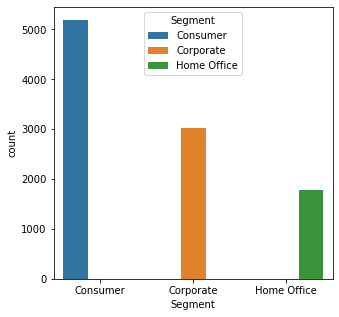

In [16]:
plt.figure(figsize = (5,5))
sns.countplot("Segment", hue = 'Segment', data = df)

### Sub-Category Wise Sales

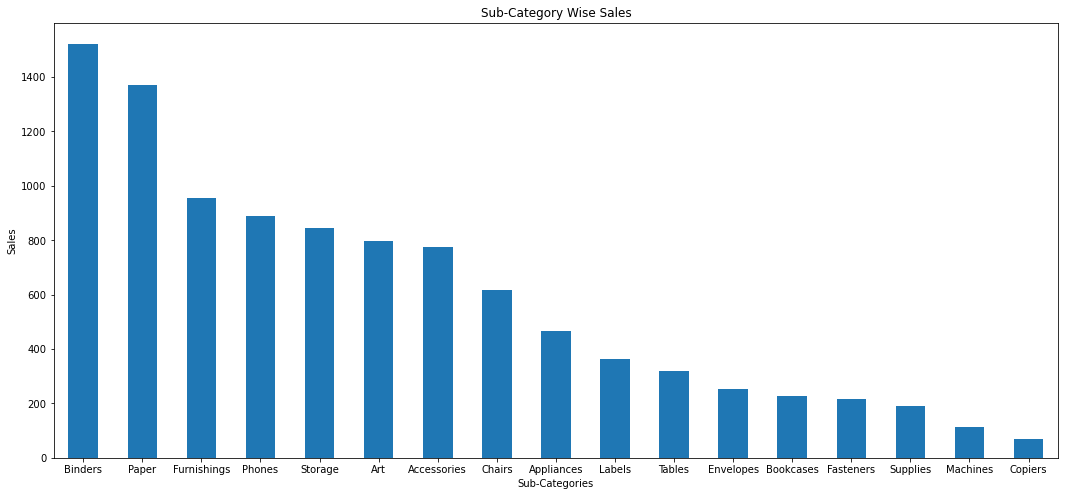

In [17]:
plt.figure(figsize = (18,8))
df['Sub-Category'].value_counts().plot.bar(rot=0)
plt.title('Sub-Category Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Sub-Categories')
plt.show()

Binders and Paper have a wide variety

### Visualizing the count of each sub-category

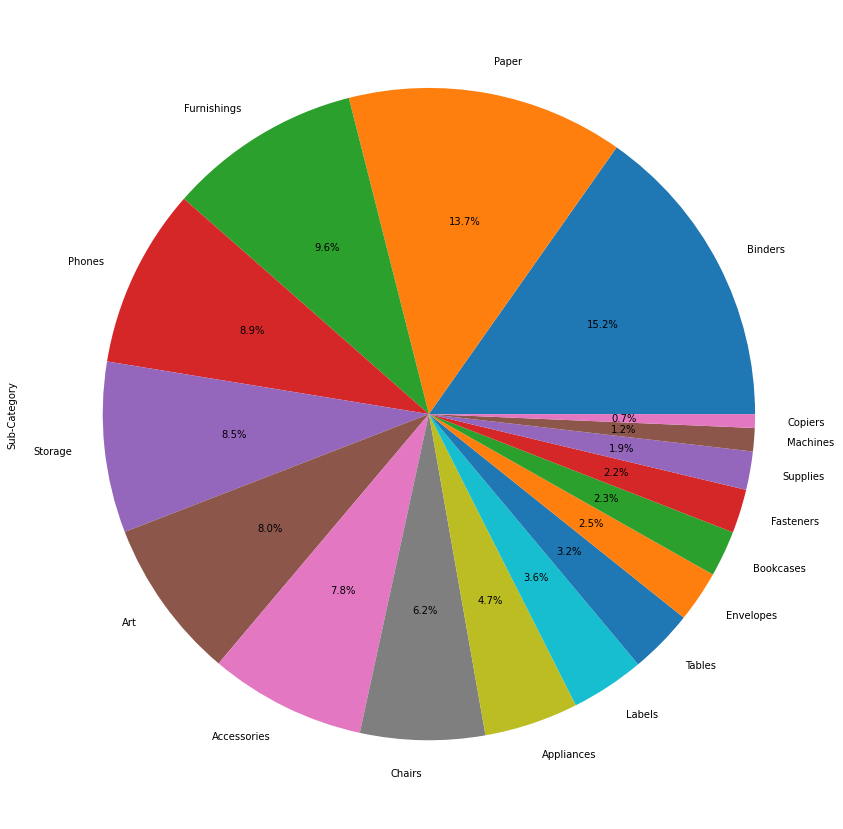

In [18]:
plt.figure(figsize=(15,15))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

### Visualising Ship Mode

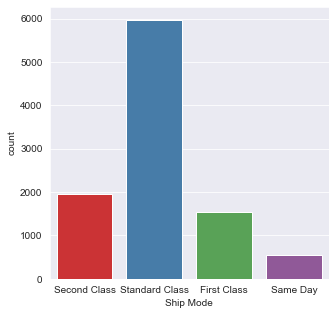

In [19]:
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
sns.countplot(x = 'Ship Mode', data = df, palette = "Set1")

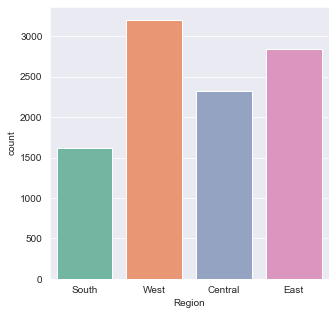

In [20]:
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
sns.countplot(x = 'Region', data = df, palette = "Set2")

### Analyzing the profit of sales

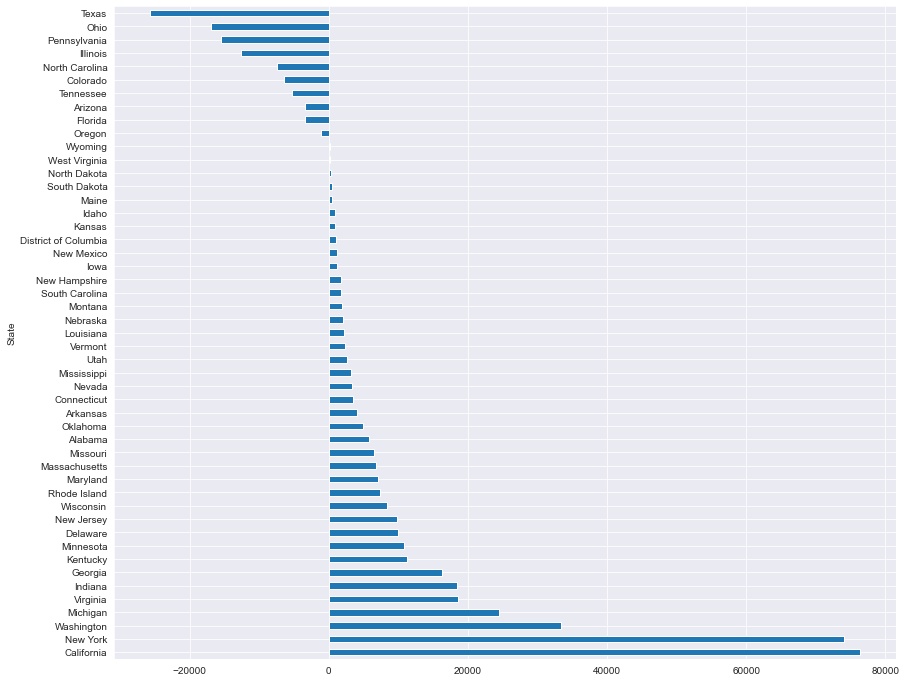

In [21]:
plt.figure(figsize = (14,12))
statewise = df.groupby(['State'])['Profit'].sum().nlargest(50)
statewise.plot.barh()

Texas has the lowest profit while California has the highest profit

## Total Profit and Sales per Category

<ipython-input-22-9b67e385707f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  s= df.groupby('Sub-Category')['Profit','Sales'].sum()


<Figure size 1080x720 with 0 Axes>

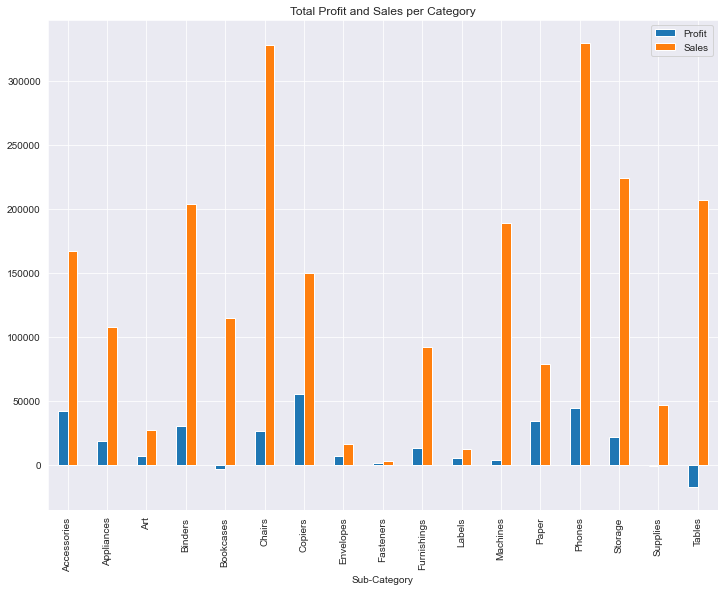

In [22]:
plt.figure(figsize = (15,10))
s= df.groupby('Sub-Category')['Profit','Sales'].sum()
s.plot.bar(title = "Total Profit and Sales per Category",figsize=(12,9));
plt.show(block = True)

## Visualising the Sales per Category

Text(0.5, 1.0, 'Sales per Category')

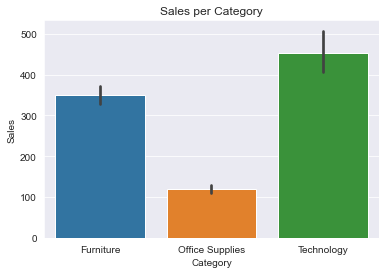

In [23]:
sns.barplot(x = 'Category', y = 'Sales', data = df)
plt.title("Sales per Category")

## Insights :

1. Office Supplies have a wide variety.
2. Technology has highest sales as compared to other categories.
3. People prefer to use standard shipment mode as compared to other modes.
4. Consumer segment has highest count as compared to others.
5. Maximum Profit earned from states like California and New York City, whereas Texas and Ohio gives more loss and products like phones and copiers give more profit, whereas tables and bookcases are on loss.
6. People from west region shop more as compared to other regions.